# OLS - Wooldridge Computer Exercise
## Chapter 4, Exercise 10

## To add a heading:
- Insert a new cell
- Type or paste-in content
- Place a single / just one "pound-sign" in front of the heading content
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

## To add a sub-heading:
- Insert a new cell
- Type or paste-in content
- Place two "pound-signs" in front of the sub-heading
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

## To add new bulleted documentation:

- Insert a new cell
- Type or paste-in content
- Place a "dash" character in front of the bulleted content
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

# References
- Wooldridge, J.M. (2016). Introductory econometrics: A modern approach (6thed.). Mason, OH: South-Western, Cengage Learning.
- Residual Plots: https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034
- Understanding residual plots: https://data.library.virginia.edu/diagnostic-plots/
- VIF: https://etav.github.io/python/vif_factor_python.html
- VIF: https://en.wikipedia.org/wiki/Variance_inflation_factor

# Instantiate libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms

from statsmodels.formula.api import ols
from statsmodels.compat import lzip
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.graphics.gofplots import ProbPlot

#import pandas.tseries.api as sm
#from tseries.formula.apt import ols

from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr


plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

# Latex markup language 
from IPython.display import Latex

# Data Read from csv

In [2]:
%%time
#df = pd.read_csv(BytesIO(csv_as_bytes),sep='|',nrows=100000)
df1 = pd.read_stata('C://Users//mvrie//Downloads//firepit-master//elem94_95.dta')
print(df1.head())

   distid  schid      lunch  enrol       staff   exppp   avgsal   avgben  \
0  1010.0   4937  48.299999  539.0   71.099998  3586.0  39383.0  13656.0   
1  2010.0   4959  51.500000   59.0  127.099998  4357.0  25622.0  10004.0   
2  2020.0   4999  51.200001   82.0  122.599998  5667.0  31318.0  12645.0   
3  2070.0    597  33.700001  409.0   77.500000  2752.0  27873.0   9657.0   
4  3010.0    790  11.900000  259.0   87.599998  3253.0  31264.0  10017.0   

       math4     story4        bs    lavgsal    lenrol    lstaff  
0  68.000000  70.699997  0.346749  10.581090  6.289716  4.264087  
1  40.000000  40.000000  0.390446  10.151207  4.077538  4.844974  
2  57.099998  57.099998  0.403761  10.351949  4.406719  4.808927  
3  63.200001  73.500000  0.346464  10.235414  6.013715  4.350278  
4  56.400002  64.099998  0.320400  10.350223  5.556828  4.472781  
Wall time: 40.9 ms


In [3]:
df1['constant'] = 1

# Data Checks
- Columns

In [4]:
%%time
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 0 to 1847
Data columns (total 15 columns):
distid      1848 non-null float32
schid       1848 non-null int16
lunch       1848 non-null float32
enrol       1848 non-null float32
staff       1848 non-null float32
exppp       1848 non-null float32
avgsal      1848 non-null float32
avgben      1848 non-null float32
math4       1848 non-null float32
story4      1848 non-null float32
bs          1848 non-null float32
lavgsal     1848 non-null float32
lenrol      1848 non-null float32
lstaff      1848 non-null float32
constant    1848 non-null int64
dtypes: float32(13), int16(1), int64(1)
memory usage: 126.3 KB
Wall time: 3.96 ms


### Question i:
### Estimate: $lavgsal = \alpha + \beta_{1}bs + \mu$
### Is the estimated slope statistically different from 0?
### Is the estimated slope statistically different from -1?

In [5]:
formula = '''lavgsal ~ bs
'''
#model = ols(formula, df).fit(cov_type='HC0')
model = ols(formula, df1)
results = model.fit()
aov_table = statsmodels.stats.anova.anova_lm(results, typ=2)
print(aov_table)
print(results.summary())

             sum_sq      df          F        PR(>F)
bs         1.508883     1.0  28.228725  1.208469e-07
Residual  98.672495  1846.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                lavgsal   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     28.23
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.21e-07
Time:                        18:39:07   Log-Likelihood:                 85.171
No. Observations:                1848   AIC:                            -166.3
Df Residuals:                    1846   BIC:                            -155.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>

In [6]:
hypotheses = 'bs = 0'
t_test = results.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.7951      0.150     -5.313      0.000      -1.089      -0.502


In [6]:
hypotheses = 'bs = -1'
t_test = results.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.7951      0.150      1.369      0.171      -1.089      -0.502


### Question ii:
### Estimate: $lavgsal = \alpha + \beta_{1}bs + \beta_{2}lenrol + \beta_{3}lstaff + \mu$
### What happens to the coefficient on bs? Compare to table 4.1 on Page 138

In [8]:
formula = '''lavgsal ~ bs + lenrol + lstaff
'''
#model = ols(formula, df).fit(cov_type='HC0')
model = ols(formula, df1)
results2 = model.fit()
aov_table = statsmodels.stats.anova.anova_lm(results2, typ=2)
print(aov_table)
print(results2.summary())

             sum_sq      df            F         PR(>F)
bs         0.871211     1.0    30.959678   3.020447e-08
lenrol     0.390683     1.0    13.883464   2.003591e-04
lstaff    45.291978     1.0  1609.512448  1.546730e-253
Residual  51.890501  1844.0          NaN            NaN
                            OLS Regression Results                            
Dep. Variable:                lavgsal   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     572.0
Date:                Sun, 16 Feb 2020   Prob (F-statistic):          9.17e-263
Time:                        18:44:43   Log-Likelihood:                 679.00
No. Observations:                1848   AIC:                            -1350.
Df Residuals:                    1844   BIC:                            -1328.
Df Model:                           3                                         
Covarianc

In [9]:
from statsmodels.iolib.summary2 import summary_col
dfoutput = summary_col([results,results2],stars=True)
print(dfoutput)


          lavgsal I  lavgsal II
-------------------------------
Intercept 10.7479*** 13.9530***
          (0.0517)   (0.1072)  
bs        -0.7951*** -0.6051***
          (0.1497)   (0.1087)  
lenrol               -0.0316***
                     (0.0085)  
lstaff               -0.7137***
                     (0.0178)  
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [8]:
hypotheses = 'bs = -1'
t_test = results2.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.6051      0.109      3.632      0.000      -0.818      -0.392


### Question v: Are staff being compensated for teaching students from disadvantaged backgrounds?
### Add school lunches to the regression

# Estimate: $lavgsal = \alpha + \beta_{1}bs + \beta_{2}lenrol + \beta_{3}lstaff + \beta_{4}lunch + \mu$

In [12]:
formula = '''lavgsal ~ bs + lenrol + lstaff + lunch
'''
#model = ols(formula, df).fit(cov_type='HC0')
model = ols(formula, df1)
results3 = model.fit()
aov_table = statsmodels.stats.anova.anova_lm(results3, typ=2)
print(aov_table)
print(results3.summary())

             sum_sq      df            F         PR(>F)
bs         0.615052     1.0    22.106102   2.771449e-06
lenrol     0.314038     1.0    11.287117   7.963830e-04
lstaff    39.366627     1.0  1414.908525  2.872966e-230
lunch      0.613197     1.0    22.039436   2.868209e-06
Residual  51.277304  1843.0          NaN            NaN
                            OLS Regression Results                            
Dep. Variable:                lavgsal   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     439.4
Date:                Sun, 16 Feb 2020   Prob (F-statistic):          4.22e-266
Time:                        19:01:24   Log-Likelihood:                 689.98
No. Observations:                1848   AIC:                            -1370.
Df Residuals:                    1843   BIC:                            -1342.
Df Model:                       

In [13]:
hypotheses = 'bs = -1'
t_test = results3.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.5161      0.110      4.408      0.000      -0.731      -0.301


In [14]:
from statsmodels.iolib.summary2 import summary_col
dfoutput = summary_col([results,results2,results3],stars=True)
print(dfoutput)


          lavgsal I  lavgsal II lavgsal III
-------------------------------------------
Intercept 10.7479*** 13.9530*** 13.8315*** 
          (0.0517)   (0.1072)   (0.1097)   
bs        -0.7951*** -0.6051*** -0.5161*** 
          (0.1497)   (0.1087)   (0.1098)   
lenrol               -0.0316*** -0.0284*** 
                     (0.0085)   (0.0085)   
lstaff               -0.7137*** -0.6906*** 
                     (0.0178)   (0.0184)   
lunch                           -0.0008*** 
                                (0.0002)   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


# Check for Multicollinearity
## Step 1: Run a multiple regression

In [15]:
%%capture

# get y and X dataframes based on this regression:
y, X = dmatrices(formula, df1, return_type='dataframe')

## Step 2: Calculate VIF Factors

In [16]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['bs','lenrol','lstaff','lunch'] = X.columns

## Step 3: Inspect VIF Factors
- Values > 10 indicate presence of significant multicollinearity

In [17]:
vif.round(1)

,VIF Factor,"(bs, lenrol, lstaff, lunch)"
0,799.7,Intercept
1,1.0,bs
2,1.1,lenrol
3,1.2,lstaff
4,1.1,lunch


In [20]:
df1.corr(method ='pearson') 

,distid,schid,lunch,enrol,staff,exppp,avgsal,avgben,math4,story4,bs,lavgsal,lenrol,lstaff,constant
distid,1.000000,-0.003280,0.010537,0.237069,-0.014483,0.099481,0.144001,0.118086,-0.043343,-0.014004,-0.026477,0.107304,0.229109,-0.044194,NaN
schid,-0.003280,1.000000,-0.154653,0.041643,-0.048037,0.013598,0.035177,0.017780,0.103925,0.124196,-0.044100,0.041852,0.027383,-0.050961,NaN
lunch,0.010537,-0.154653,1.000000,0.038689,0.252776,-0.014196,-0.262519,-0.177024,-0.566820,-0.578274,0.179107,-0.272617,0.010135,0.259275,NaN
enrol,0.237069,0.041643,0.038689,1.000000,-0.219067,-0.276976,0.013901,0.006774,-0.072997,-0.028881,0.008790,0.021511,0.911123,-0.228073,NaN
staff,-0.014483,-0.048037,0.252776,-0.219067,1.000000,0.369133,-0.608315,-0.562311,-0.140767,-0.113211,0.040181,-0.655558,-0.260099,0.964062,NaN
exppp,0.099481,0.013598,-0.014196,-0.276976,0.369133,1.000000,0.352022,0.353366,0.048111,0.036317,0.032672,0.326103,-0.248169,0.360484,NaN
avgsal,0.144001,0.035177,-0.262519,0.013901,-0.608315,0.352022,1.000000,0.919553,0.140876,0.108640,-0.088044,0.982486,0.104417,-0.661710,NaN
avgben,0.118086,0.017780,-0.177024,0.006774,-0.562311,0.353366,0.919553,1.000000,0.069624,0.043975,0.279500,0.896600,0.096115,-0.615293,NaN
math4,-0.043343,0.103925,-0.566820,-0.072997,-0.140767,0.048111,0.140876,0.069624,1.000000,0.807219,-0.162174,0.155142,-0.062417,-0.137655,NaN
story4,-0.014004,0.124196,-0.578274,-0.028881,-0.113211,0.036317,0.108640,0.043975,0.807219,1.000000,-0.150156,0.119587,-0.019704,-0.111167,NaN


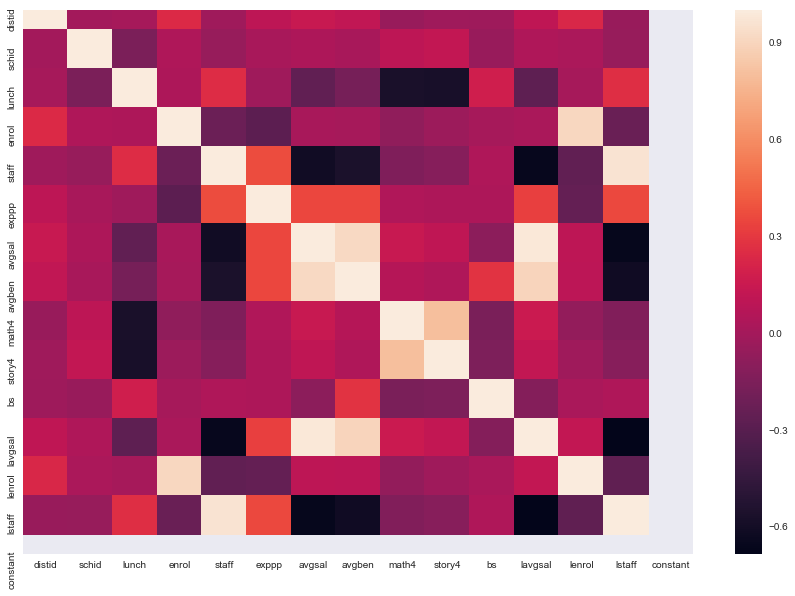

In [21]:
corr = df1.corr(method ='pearson') 
plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [19]:
# Multicolinearity
np.linalg.cond(results3.model.exog)

1460.8521159811198

# Checks for Heteroscedasticity

In [18]:
print("Heteroscedasticity Test - Breusch Pagan")
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results3.resid, results3.model.exog)
lzip(name, test)

Heteroscedasticity Test - Breusch Pagan


[('Lagrange multiplier statistic', 96.55206887897155),
 ('p-value', 5.3286891316737626e-20),
 ('f-value', 25.39976492907346),
 ('f p-value', 1.6450102955552847e-20)]

# Residual Plotting
- First add some setup variables from the "results" model output.

In [22]:
# fitted values (need a constant term for intercept)
model_fitted_y = results3.fittedvalues

# model residuals
model_residuals = results3.resid

# normalized residuals
model_norm_residuals = results3.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = results3.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = results3.get_influence().cooks_distance[0]

# Residual Plot
## non-linear plot line indicative of non-linear relationship not captured in model

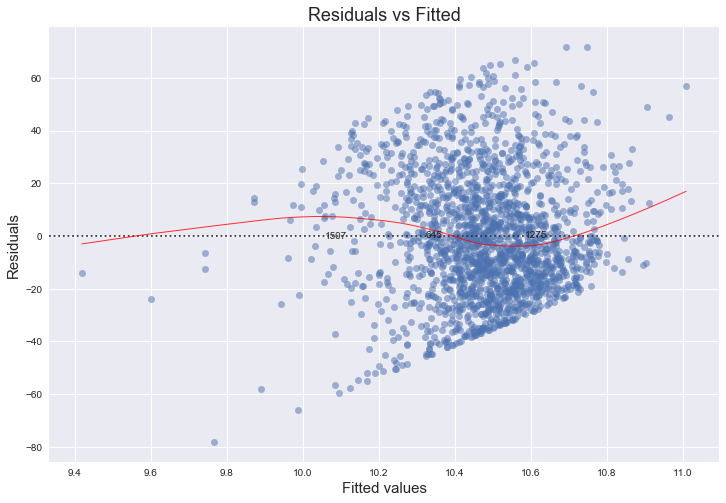

In [23]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'lunch', data=df1, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

# QQ Plot
- residuals following plot line well indicative of normally distributed residuals
- residuals that deviate sharply indicative of non-normally distributed residuals

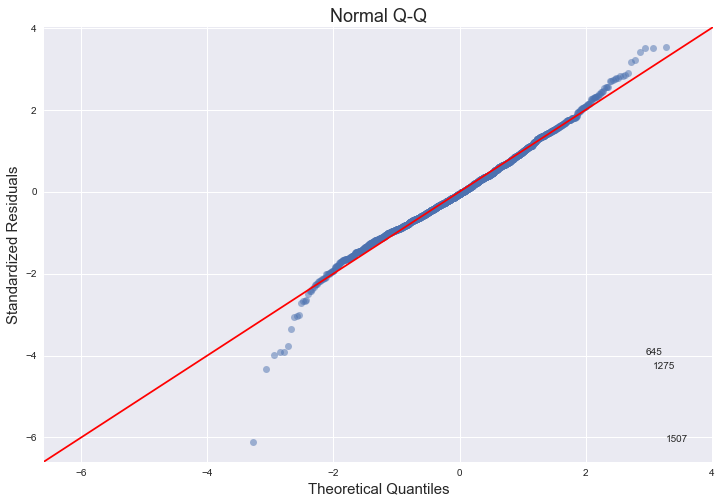

In [24]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

# Scale Location Plot
## indicative of homoscedastic residuals
- Good to see even spread with horizontal line
- Bad to see sloped line with spread following a pattern

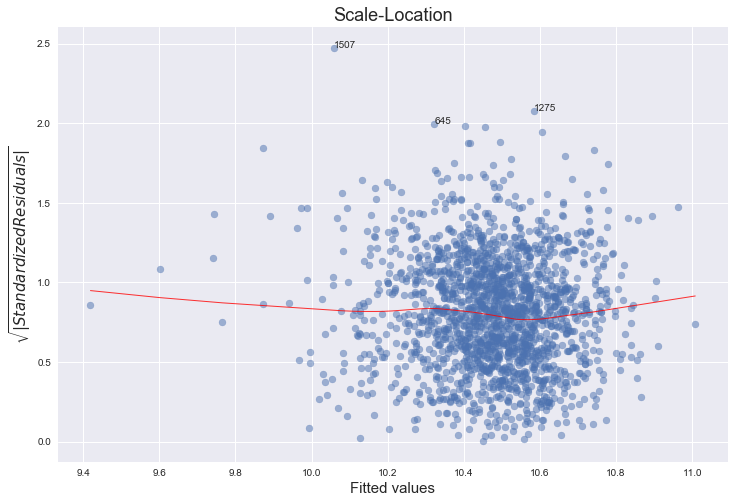

In [25]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

# Leverage Plot
## helps us find influential cases (outliers)

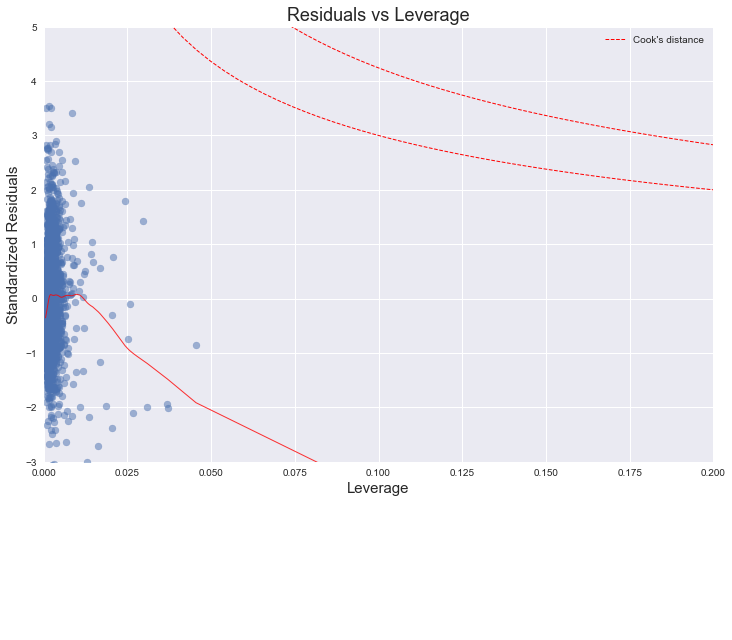

In [26]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(results.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');
